<a href="https://colab.research.google.com/github/Baasty-OCh/Miner-a-curso-/blob/test_colab/P2_T2Gestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Pregunta 2
##2.2

In [44]:
# No debería ser necesario en Colab para estos paquetes, pero por si acaso:
!pip install pandas openpyxl scikit-learn matplotlib


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Crear los datos, desde el excel (sumando los productos por semana)
ventas = [
    96, 87, 91, 94, 96, 83, 100, 105, 106, 91,
    106, 95, 101, 72, 86, 85, 99, 104, 94, 116,
    90, 109, 87, 93, 98, 94, 66, 81, 67, 73,
    92, 52, 106, 46, 96, 62, 116, 53, 118, 51,
    64, 81, 69, 87, 63, 86, 88, 99, 105, 130,
    130, 133
]

# Crear las etiquetas de semanas
semanas = [f'W{i}' for i in range(len(ventas))]

# Crear el DataFrame
matriz_ventas = pd.DataFrame([ventas], columns=semanas, index=['Total/semana'])




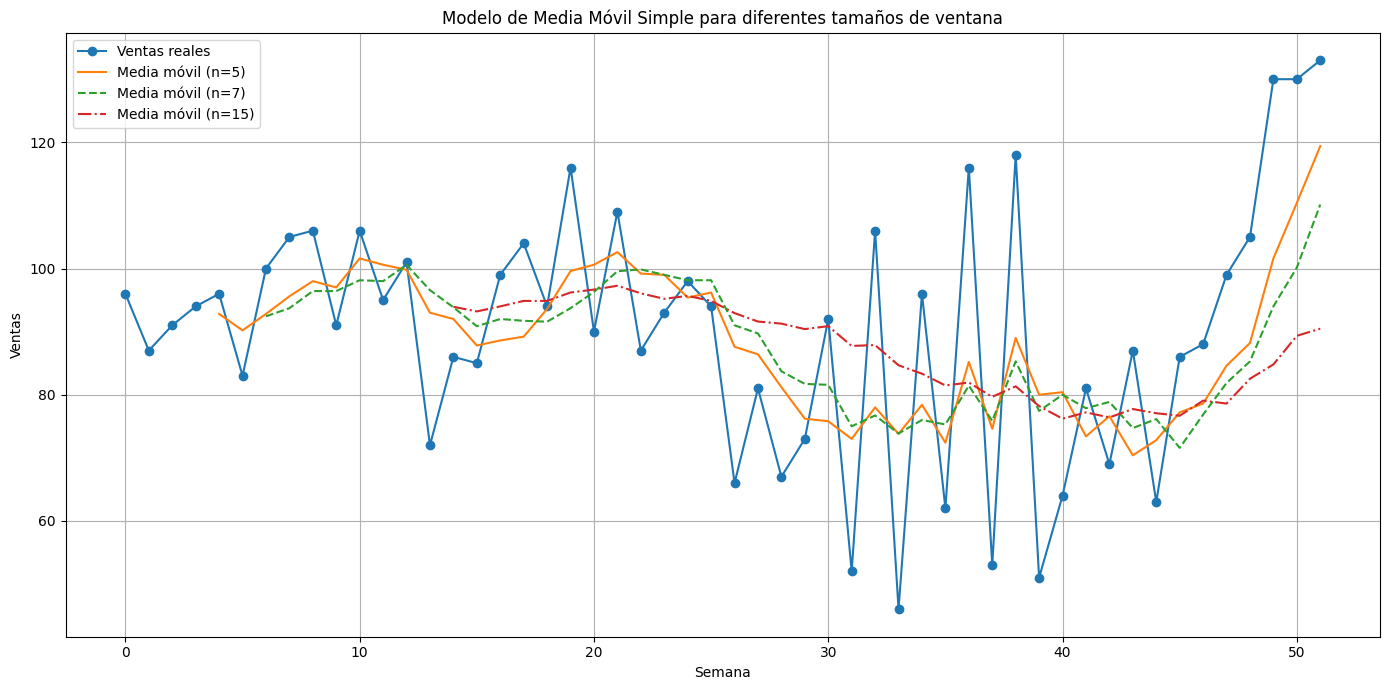

In [46]:
# Primero, convertir los datos a una serie temporal adecuada
ventas_series = matriz_ventas.loc['Total/semana'].astype(float)

# Aplicar medias móviles simples
rolling_5 = ventas_series.rolling(window=5).mean()
rolling_7 = ventas_series.rolling(window=7).mean()
rolling_15 = ventas_series.rolling(window=15).mean()

# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(ventas_series.values, label='Ventas reales', marker='o')
plt.plot(rolling_5.values, label='Media móvil (n=5)', linestyle='-')
plt.plot(rolling_7.values, label='Media móvil (n=7)', linestyle='--')
plt.plot(rolling_15.values, label='Media móvil (n=15)', linestyle='-.')
plt.title('Modelo de Media Móvil Simple para diferentes tamaños de ventana')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






In [47]:

# Calcular errores MSE para cada modelo
from sklearn.metrics import mean_squared_error
import numpy as np

def mse_with_nan(real, pred):
    mask = ~np.isnan(pred)
    return mean_squared_error(real[mask], pred[mask])

mse_5 = mse_with_nan(ventas_series.values, rolling_5.values)
mse_7 = mse_with_nan(ventas_series.values, rolling_7.values)
mse_15 = mse_with_nan(ventas_series.values, rolling_15.values)

# Crear un resumen
mse_summary = pd.DataFrame({
    'Tamaño de ventana': [5, 7, 15],
    'MSE': [mse_5, mse_7, mse_15]
})
mse_summary

,Tamaño de ventana,MSE
0,5,230.323333
1,7,302.779947
2,15,456.027953


#El mejor 𝑛 es 5, ya que en primer lugar tiene el menor error según la métrica MSE. Esto quiere decir que captura mejor las variaciones semanales, ya que generaliza lo suficiente para evitar el ruido y aun así seguir la tendencia.Esto le da mayor sensibilidad a cambios por eventos específicos, es compatible con este ciclo de serie de tiempo,y podemos notarlo al ver cómo guarda similitud con la curva que grafica el comportamiento real.

##2.3

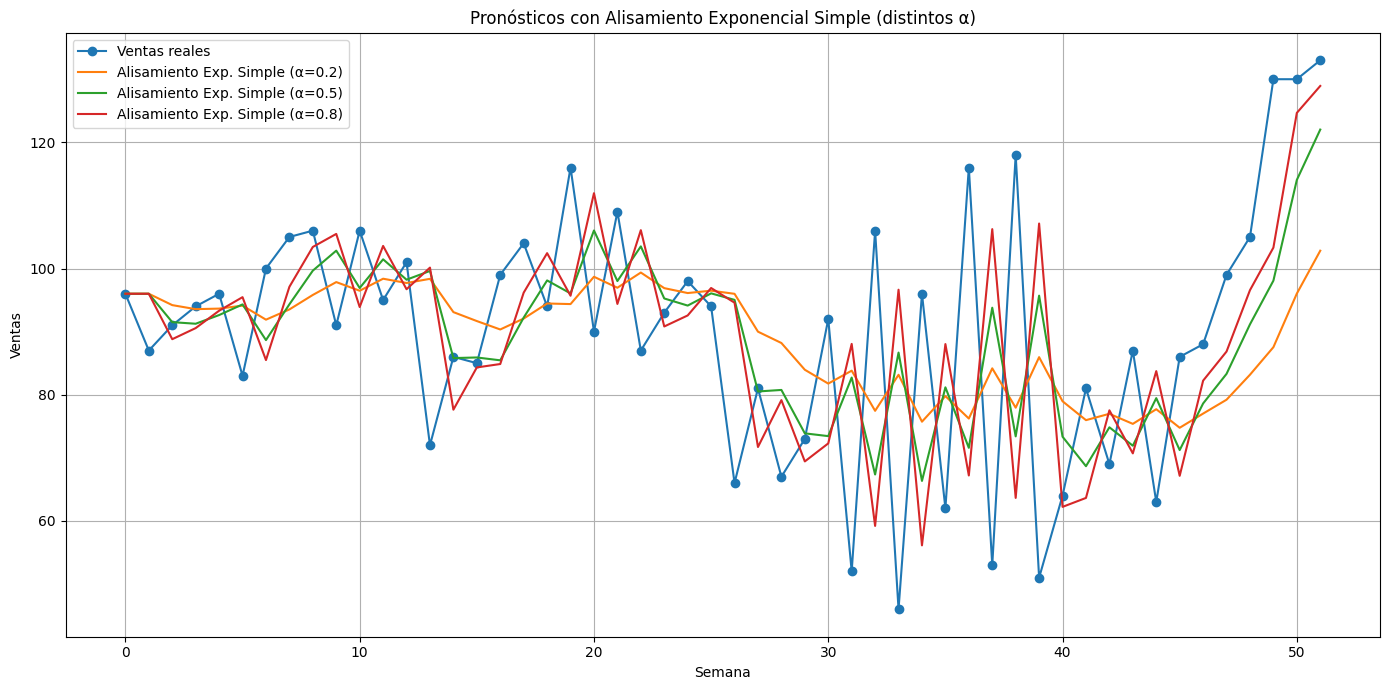

In [48]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Definimos valores de alpha a utilizar
alphas = [0.2, 0.5, 0.8]

# Diccionario para guardar los modelos
ses_models = {}
predictions = {}
mse_values = {}

# Entrenar y predecir usando alisamiento exponencial simple para cada alpha
for alpha in alphas:
    model = SimpleExpSmoothing(ventas_series.values).fit(smoothing_level=alpha, optimized=False)
    pred = model.fittedvalues
    mse = mean_squared_error(ventas_series.values, pred)

    ses_models[alpha] = model
    predictions[alpha] = pred
    mse_values[alpha] = mse

# Graficar los resultados
plt.figure(figsize=(14, 7))
plt.plot(ventas_series.values, label='Ventas reales', marker='o')
for alpha in alphas:
    plt.plot(predictions[alpha], label=f'Alisamiento Exp. Simple (α={alpha})')

plt.title('Pronósticos con Alisamiento Exponencial Simple (distintos α)')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()






In [49]:
# Crear un resumen de los MSE
mse_summary_alpha = pd.DataFrame({
    'Alpha': list(mse_values.keys()),
    'MSE': list(mse_values.values())
}).sort_values(by='MSE')
mse_summary_alpha

,Alpha,MSE
0,0.2,368.722163
1,0.5,388.624131
2,0.8,523.607615


#El parametro alfa define cuanto peso se le da a la observación reciente, entre más grande mas importancia se le da a los datos recientes. Al variarlo cambiamos con cuanta rapidez el modelo se adapata a los cambios reales en la demanda, lo cual se me reflejada en la 'suavidad' de los pronosticos
#Así el alfa = 0.2 crea una curva muy suave en comparación a la de 0.8 (más similar a la original)
#El mejor alfa en todo caso, es el 0.2, ya que tiene menor MSE, esto queire decir que logra filtrar las variaciones aletaorias y se enfoca en la tendencia prinicpal de los datos
#Este alfa pequeño nos permite mantenernos constantes y no inducir a la sobre reaccion ante cambios insignificantes(ej: no pedir100 lapices mas por que la semana pasada se vendieron mucho)


##2.4

<ipython-input-50-32c665220edf>:13: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(ventas_series.values, trend='additive', seasonal=None).fit(
<ipython-input-50-32c665220edf>:13: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(ventas_series.values, trend='additive', seasonal=None).fit(
<ipython-input-50-32c665220edf>:13: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(ventas_series.values, trend='additive', seasonal=None).fit(
<ipython-input-50-32c665220edf>:13: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model = ExponentialSmoothing(ventas_series.values, trend='additive', seasonal=None).fit(


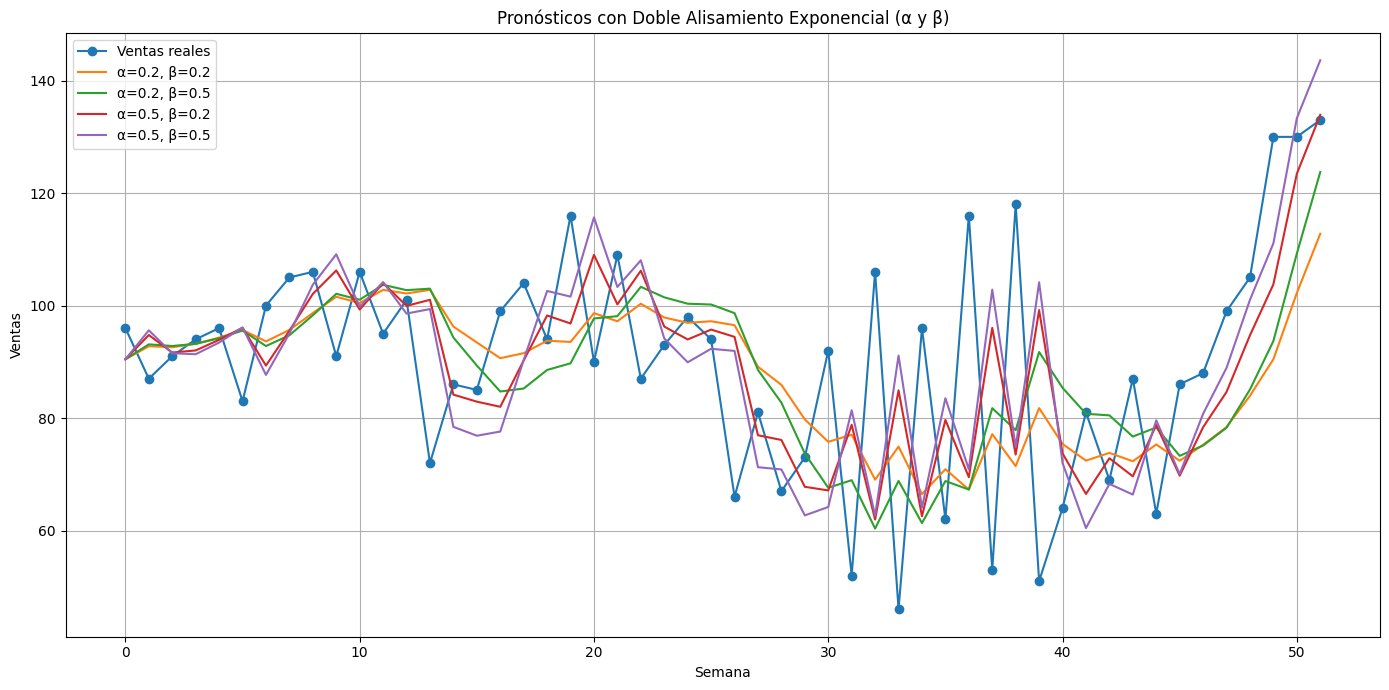

In [50]:

# Definir valores de alpha y beta a usar
alpha_values = [0.2, 0.5]
beta_values = [0.2, 0.5]

# Diccionario para guardar resultados
double_exp_models = {}
predictions_double = {}
mse_double = {}

# Entrenar y predecir usando doble alisamiento para cada combinación de alpha y beta
for alpha in alpha_values:
    for beta in beta_values:
        model = ExponentialSmoothing(ventas_series.values, trend='additive', seasonal=None).fit(
            smoothing_level=alpha,
            smoothing_slope=beta,
            optimized=False
        )
        pred = model.fittedvalues
        mse = mean_squared_error(ventas_series.values, pred)

        double_exp_models[(alpha, beta)] = model
        predictions_double[(alpha, beta)] = pred
        mse_double[(alpha, beta)] = mse

# Graficar resultados
plt.figure(figsize=(14, 7))
plt.plot(ventas_series.values, label='Ventas reales', marker='o')
for (alpha, beta), pred in predictions_double.items():
    plt.plot(pred, label=f'α={alpha}, β={beta}')

plt.title('Pronósticos con Doble Alisamiento Exponencial (α y β)')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:

# Crear un resumen de los MSE
mse_summary_double = pd.DataFrame({
    'Alpha': [key[0] for key in mse_double.keys()],
    'Beta': [key[1] for key in mse_double.keys()],
    'MSE': list(mse_double.values())
}).sort_values(by='MSE')
mse_summary_double

,Alpha,Beta,MSE
0,0.2,0.2,364.638892
1,0.2,0.5,385.743742
2,0.5,0.2,406.701558
3,0.5,0.5,446.768445


##2.5

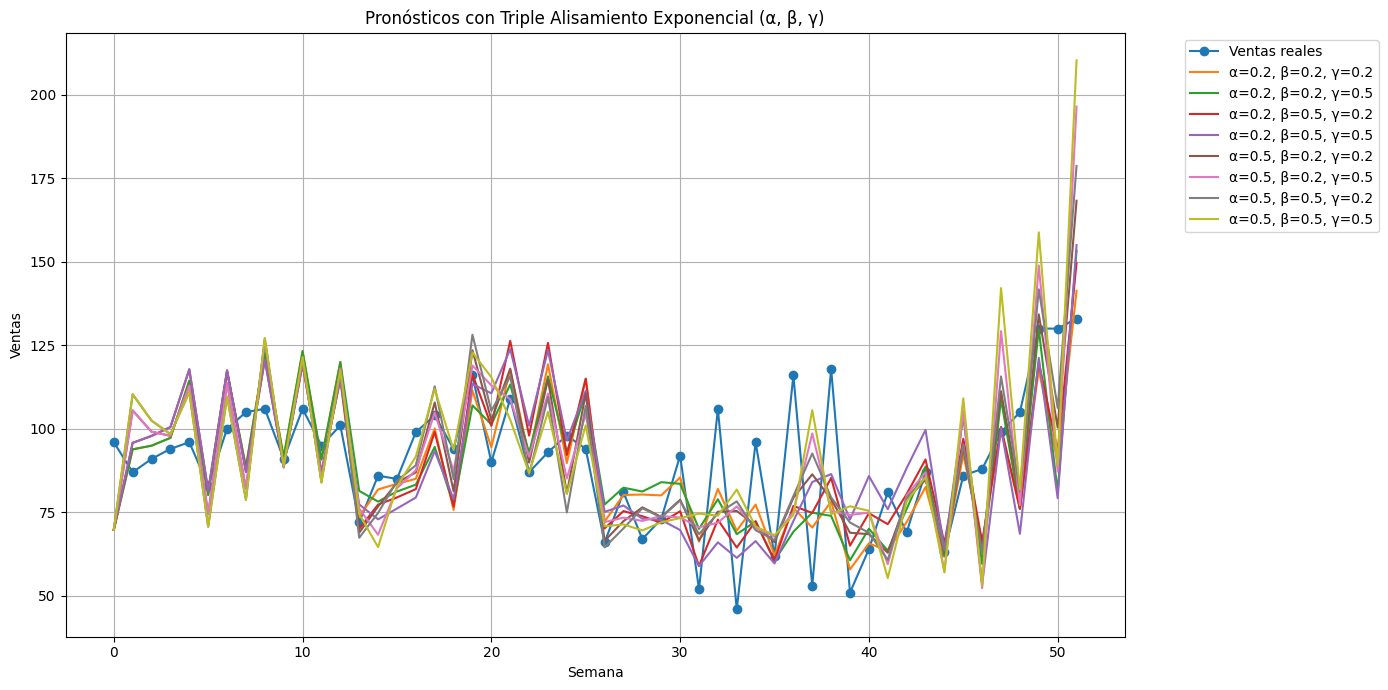

In [58]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Definir valores de alpha, beta y gamma a usar
alpha_values = [0.2, 0.5]
beta_values = [0.2, 0.5]
gamma_values = [0.2, 0.5]

# Ciclo estacional de longitud 13
seasonal_periods = 13

# Diccionarios para guardar resultados
triple_exp_models = {}
predictions_triple = {}
mse_triple = {}

# Entrenar y predecir usando triple alisamiento para cada combinación
for alpha in alpha_values:
    for beta in beta_values:
        for gamma in gamma_values:
            model = ExponentialSmoothing(
                ventas_series.values,
                trend='additive',
                seasonal='multiplicative',
                seasonal_periods=seasonal_periods
            ).fit(
                smoothing_level=alpha,
                smoothing_trend=beta,
                smoothing_seasonal=gamma,
                optimized=False
            )
            pred = model.fittedvalues
            mse = mean_squared_error(ventas_series.values, pred)

            triple_exp_models[(alpha, beta, gamma)] = model
            predictions_triple[(alpha, beta, gamma)] = pred
            mse_triple[(alpha, beta, gamma)] = mse

# Graficar resultados
plt.figure(figsize=(14, 7))
plt.plot(ventas_series.values, label='Ventas reales', marker='o')
for (alpha, beta, gamma), pred in predictions_triple.items():
    plt.plot(pred, label=f'α={alpha}, β={beta}, γ={gamma}')

plt.title('Pronósticos con Triple Alisamiento Exponencial (α, β, γ)')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
# Crear un resumen de los MSE
mse_summary_triple = pd.DataFrame({
    'Alpha': [key[0] for key in mse_triple.keys()],
    'Beta': [key[1] for key in mse_triple.keys()],
    'Gamma': [key[2] for key in mse_triple.keys()],
    'MSE': list(mse_triple.values())
}).sort_values(by='MSE')
mse_summary_triple

,Alpha,Beta,Gamma,MSE
0,0.2,0.2,0.2,260.998219
2,0.2,0.5,0.2,281.539865
4,0.5,0.2,0.2,314.313808
1,0.2,0.2,0.5,329.489416
6,0.5,0.5,0.2,355.936683
3,0.2,0.5,0.5,393.483418
5,0.5,0.2,0.5,478.095154
7,0.5,0.5,0.5,577.503050


##2.6

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
# PASO 1: MEDIA MÓVIL - Encontrar el mejor 'n' minimizando MSE y MAPE

# Probar n desde 2 hasta 20
n_values = range(2, 21)

# Guardar resultados
results = []

for n in n_values:
    # Calcular la media móvil
    rolling_pred = ventas_series.rolling(window=n).mean()

    # Para calcular MSE y MAPE necesitamos eliminar los valores NaN
    mask = ~np.isnan(rolling_pred)
    real = ventas_series[mask]
    pred = rolling_pred[mask]

    mse = mean_squared_error(real, pred)
    mape = mean_absolute_percentage_error(real, pred) * 100  # Convertir a porcentaje

    results.append({'n': n, 'MSE': mse, 'MAPE': mape})

# Crear DataFrame resumen
sma_results_df = pd.DataFrame(results).sort_values(by='MSE')
print(sma_results_df)


# Mostrar los mejores n según MSE y MAPE
best_n_mse = sma_results_df.loc[sma_results_df['MSE'].idxmin()]
best_n_mape = sma_results_df.loc[sma_results_df['MAPE'].idxmin()]

print(f"Mejor n según MSE: {int(best_n_mse['n'])}, con MSE = {best_n_mse['MSE']:.2f}")
print(f"Mejor n según MAPE: {int(best_n_mape['n'])}, con MAPE = {best_n_mape['MAPE']:.2f}%")


     n         MSE       MAPE
1    3  138.684444  11.796498
0    2  178.632353  12.871126
2    4  220.693878  14.581842
3    5  230.323333  15.590071
4    6  277.930851  16.471196
5    7  302.779947  17.654261
6    8  334.320486  18.061559
7    9  361.564254  19.087198
8   10  376.464651  18.935979
9   11  413.313262  20.020373
10  12  415.902608  19.965705
12  14  443.588043  21.177104
11  13  444.635503  21.019365
13  15  456.027953  21.242069
14  16  466.071579  21.759114
15  17  493.567570  22.400241
16  18  510.136243  23.091994
17  19  536.282548  23.740768
18  20  559.485530  24.773302
Mejor n según MSE: 3, con MSE = 138.68
Mejor n según MAPE: 3, con MAPE = 11.80%


In [67]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# PASO 2: ALISAMIENTO EXPONENCIAL SIMPLE (SES) - Encontrar el mejor alpha

# Definir el rango de alpha a probar
alpha_values = np.linspace(0.01, 0.99, 99)  # 99 valores de alpha entre 0.01 y 0.99

# Guardar resultados
ses_results = []

for alpha in alpha_values:
    model = SimpleExpSmoothing(ventas_series.values).fit(smoothing_level=alpha, optimized=False)
    pred = model.fittedvalues

    mse = mean_squared_error(ventas_series.values, pred)
    mape = mean_absolute_percentage_error(ventas_series.values, pred) * 100  # En porcentaje

    ses_results.append({'Alpha': alpha, 'MSE': mse, 'MAPE': mape})

# Crear DataFrame resumen
ses_results_df = pd.DataFrame(ses_results).sort_values(by='MSE')
print(ses_results_df)


# Mostrar los mejores Alpha según MSE y MAPE
best_alpha_mse = ses_results_df.loc[ses_results_df['MSE'].idxmin()]
best_alpha_mape = ses_results_df.loc[ses_results_df['MAPE'].idxmin()]

print(f"Mejor alpha según MSE: {best_alpha_mse['Alpha']:.2f}, con MSE = {best_alpha_mse['MSE']:.2f}")
print(f"Mejor alpha según MAPE: {best_alpha_mape['Alpha']:.2f}, con MAPE = {best_alpha_mape['MAPE']:.2f}%")



    Alpha         MSE       MAPE
29   0.30  361.393954  18.625623
28   0.29  361.423091  18.624321
30   0.31  361.510394  18.628566
27   0.28  361.600689  18.624708
31   0.32  361.769659  18.633110
..    ...         ...        ...
94   0.95  647.158817  24.299604
95   0.96  657.302187  24.483433
96   0.97  667.727329  24.670056
97   0.98  678.443534  24.859525
98   0.99  689.460522  25.051891

[99 rows x 3 columns]
Mejor alpha según MSE: 0.30, con MSE = 361.39
Mejor alpha según MAPE: 0.29, con MAPE = 18.62%


In [69]:
# PASO 3: DOBLE ALISAMIENTO EXPONENCIAL (HOLT) - Encontrar los mejores alpha y beta

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Definir rango de alpha y beta
alpha_values = np.linspace(0.01, 0.99, 10)  # 10 valores equiespaciados
beta_values = np.linspace(0.01, 0.99, 10)   # 10 valores equiespaciados

# Guardar resultados
holt_results = []

for alpha in alpha_values:
    for beta in beta_values:
        try:
            model = ExponentialSmoothing(
                ventas_series.values,
                trend='additive',
                seasonal=None
            ).fit(
                smoothing_level=alpha,
                smoothing_trend=beta,
                optimized=False
            )
            pred = model.fittedvalues

            mse = mean_squared_error(ventas_series.values, pred)
            mape = mean_absolute_percentage_error(ventas_series.values, pred) * 100

            holt_results.append({'Alpha': alpha, 'Beta': beta, 'MSE': mse, 'MAPE': mape})

        except Exception as e:
            # A veces algunas combinaciones pueden fallar en converger
            continue

# Crear DataFrame resumen
holt_results_df = pd.DataFrame(holt_results).sort_values(by='MSE')
print(holt_results_df)

# Mostrar los mejores Alpha y Beta según MSE y MAPE
best_holt_mse = holt_results_df.loc[holt_results_df['MSE'].idxmin()]
best_holt_mape = holt_results_df.loc[holt_results_df['MAPE'].idxmin()]

print(f"Mejor combinación según MSE: alpha = {best_holt_mse['Alpha']:.2f}, beta = {best_holt_mse['Beta']:.2f}, con MSE = {best_holt_mse['MSE']:.2f}")
print(f"Mejor combinación según MAPE: alpha = {best_holt_mape['Alpha']:.2f}, beta = {best_holt_mape['Beta']:.2f}, con MAPE = {best_holt_mape['MAPE']:.2f}%")



       Alpha      Beta          MSE       MAPE
22  0.227778  0.227778   360.613235  17.892808
14  0.118889  0.445556   361.930492  17.241321
30  0.336667  0.010000   363.392539  19.101302
31  0.336667  0.118889   366.080206  18.315803
23  0.227778  0.336667   366.189299  18.013810
..       ...       ...          ...        ...
96  0.990000  0.663333  1449.415525  36.778413
89  0.881111  0.990000  1500.505197  37.600894
97  0.990000  0.772222  1689.685083  39.625628
98  0.990000  0.881111  1994.267031  42.844671
99  0.990000  0.990000  2388.149091  46.602531

[100 rows x 4 columns]
Mejor combinación según MSE: alpha = 0.23, beta = 0.23, con MSE = 360.61
Mejor combinación según MAPE: alpha = 0.12, beta = 0.45, con MAPE = 17.24%


In [71]:
# PASO 4: TRIPLE ALISAMIENTO EXPONENCIAL (HOLT-WINTERS) - Encontrar mejores alpha, beta y gamma

# Definir rango de alpha, beta y gamma
alpha_values = np.linspace(0.01, 0.99, 5)  # 5 valores para hacer búsqueda razonable
beta_values = np.linspace(0.01, 0.99, 5)
gamma_values = np.linspace(0.01, 0.99, 5)

# Ciclo estacional de longitud 13
seasonal_periods = 13

# Guardar resultados
hw_results = []

for alpha in alpha_values:
    for beta in beta_values:
        for gamma in gamma_values:
            try:
                model = ExponentialSmoothing(
                    ventas_series.values,
                    trend='additive',
                    seasonal='multiplicative',
                    seasonal_periods=seasonal_periods
                ).fit(
                    smoothing_level=alpha,
                    smoothing_trend=beta,
                    smoothing_seasonal=gamma,
                    optimized=False
                )
                pred = model.fittedvalues

                mse = mean_squared_error(ventas_series.values, pred)
                mape = mean_absolute_percentage_error(ventas_series.values, pred) * 100

                hw_results.append({'Alpha': alpha, 'Beta': beta, 'Gamma': gamma, 'MSE': mse, 'MAPE': mape})

            except Exception as e:
                continue

# Crear DataFrame resumen
hw_results_df = pd.DataFrame(hw_results).sort_values(by='MSE')
print(hw_results_df)

# Mostrar los mejores Alpha, Beta y Gamma según MSE y MAPE
best_hw_mse = hw_results_df.loc[hw_results_df['MSE'].idxmin()]
best_hw_mape = hw_results_df.loc[hw_results_df['MAPE'].idxmin()]

print(f"Mejor combinación según MSE: alpha = {best_hw_mse['Alpha']:.2f}, beta = {best_hw_mse['Beta']:.2f}, gamma = {best_hw_mse['Gamma']:.2f}, con MSE = {best_hw_mse['MSE']:.2f}")
print(f"Mejor combinación según MAPE: alpha = {best_hw_mape['Alpha']:.2f}, beta = {best_hw_mape['Beta']:.2f}, gamma = {best_hw_mape['Gamma']:.2f}, con MAPE = {best_hw_mape['MAPE']:.2f}%")



     Alpha   Beta  Gamma           MSE        MAPE
25   0.255  0.010  0.010  2.244839e+02   12.951870
30   0.255  0.255  0.010  2.326490e+02   12.847946
35   0.255  0.500  0.010  2.365377e+02   13.980774
40   0.255  0.745  0.010  2.388848e+02   14.393770
50   0.500  0.010  0.010  2.442121e+02   14.356386
..     ...    ...    ...           ...         ...
99   0.745  0.990  0.990  1.624428e+05   85.710977
118  0.990  0.745  0.745  2.173623e+05  145.717456
123  0.990  0.990  0.745  1.358508e+06  455.103450
124  0.990  0.990  0.990  1.581365e+06  419.846321
119  0.990  0.745  0.990  3.733160e+06  329.437643

[125 rows x 5 columns]
Mejor combinación según MSE: alpha = 0.26, beta = 0.01, gamma = 0.01, con MSE = 224.48
Mejor combinación según MAPE: alpha = 0.26, beta = 0.26, gamma = 0.01, con MAPE = 12.85%


In [73]:
# Mejorar el código para mostrar una tabla clara en consola

# Crear la tabla resumen como antes
resumen_final = pd.DataFrame({
    'Modelo': [
        'Media Móvil Simple',
        'Alisamiento Exponencial Simple (SES)',
        'Doble Alisamiento Exponencial (Holt)',
        'Triple Alisamiento Exponencial (Holt-Winters)'
    ],
    'Parámetros Óptimos': [
        'n = 3',
        'alpha = 0.30',
        'alpha = 0.23, beta = 0.23',
        'alpha = 0.26, beta = 0.01, gamma = 0.01'
    ],
    'MSE': [
        138.68,
        361.39,
        360.61,
        224.48
    ],
    'MAPE (%)': [
        11.80,
        18.62,
        17.24,
        12.85
    ]
})


# Formatear tabla de manera bonita para consola
print("\n" + "="*95)
print(f"| {'Modelo':40} | {'Parámetros Óptimos':30} | {'MSE':8} | {'MAPE (%)':8} |")
print("="*95)
for idx, row in resumen_final.iterrows():
    print(f"| {row['Modelo'][:40]:40} | {row['Parámetros Óptimos'][:30]:30} | {row['MSE']:8.2f} | {row['MAPE (%)']:8.2f} |")
print("="*95)




| Modelo                                   | Parámetros Óptimos             | MSE      | MAPE (%) |
| Media Móvil Simple                       | n = 3                          |   138.68 |    11.80 |
| Alisamiento Exponencial Simple (SES)     | alpha = 0.30                   |   361.39 |    18.62 |
| Doble Alisamiento Exponencial (Holt)     | alpha = 0.23, beta = 0.23      |   360.61 |    17.24 |
| Triple Alisamiento Exponencial (Holt-Win | alpha = 0.26, beta = 0.01, gam |   224.48 |    12.85 |


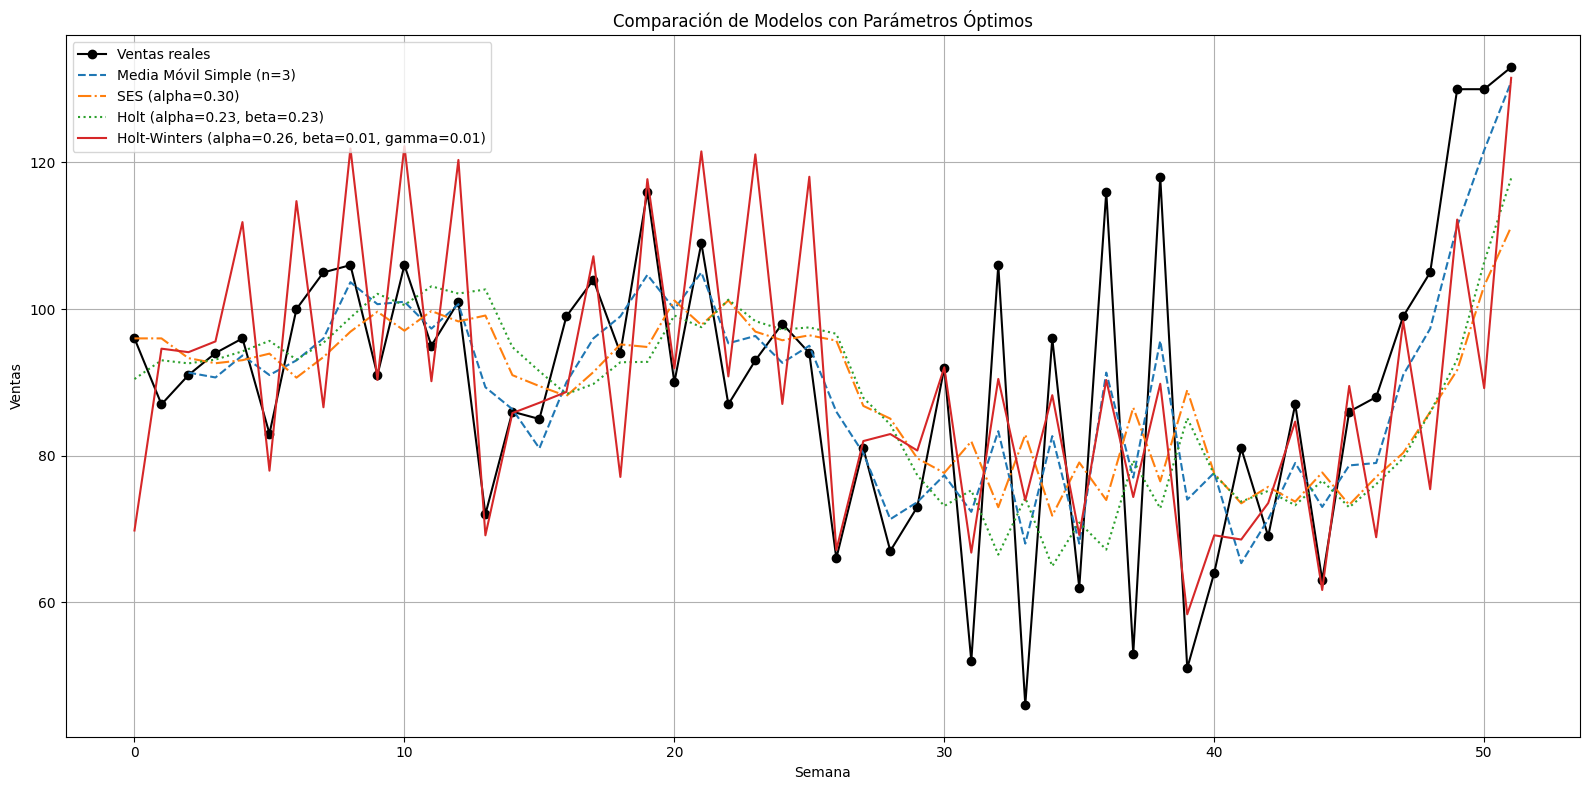

In [74]:
# Volver a calcular cada modelo usando los parámetros óptimos encontrados

# 1. Media Móvil Simple (n = 3)
sma_best = ventas_series.rolling(window=3).mean()

# 2. Alisamiento Exponencial Simple (SES) (alpha = 0.30)
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
ses_best_model = SimpleExpSmoothing(ventas_series.values).fit(smoothing_level=0.30, optimized=False)
ses_best = ses_best_model.fittedvalues

# 3. Doble Alisamiento Exponencial (Holt) (alpha = 0.23, beta = 0.23)
from statsmodels.tsa.holtwinters import ExponentialSmoothing
holt_best_model = ExponentialSmoothing(
    ventas_series.values,
    trend='additive',
    seasonal=None
).fit(smoothing_level=0.23, smoothing_trend=0.23, optimized=False)
holt_best = holt_best_model.fittedvalues

# 4. Triple Alisamiento Exponencial (Holt-Winters) (alpha = 0.26, beta = 0.01, gamma = 0.01, L=13)
hw_best_model = ExponentialSmoothing(
    ventas_series.values,
    trend='additive',
    seasonal='multiplicative',
    seasonal_periods=13
).fit(smoothing_level=0.26, smoothing_trend=0.01, smoothing_seasonal=0.01, optimized=False)
hw_best = hw_best_model.fittedvalues

# Plot todas las curvas
plt.figure(figsize=(16, 8))
plt.plot(ventas_series.values, label='Ventas reales', marker='o', color='black')
plt.plot(sma_best.values, label='Media Móvil Simple (n=3)', linestyle='--')
plt.plot(ses_best, label='SES (alpha=0.30)', linestyle='-.')
plt.plot(holt_best, label='Holt (alpha=0.23, beta=0.23)', linestyle=':')
plt.plot(hw_best, label='Holt-Winters (alpha=0.26, beta=0.01, gamma=0.01)', linestyle='solid')

plt.title('Comparación de Modelos con Parámetros Óptimos')
plt.xlabel('Semana')
plt.ylabel('Ventas')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()
